In [1]:
%reload_ext autoreload
%autoreload 2
import numpy as np
import pynocular as pn

In [2]:
# Generate some test data
p = pn.PointData()
p['x'] = np.linspace(0, 1, 100)
p['y'] = np.random.rand(100)
p['a'] = p['x'] ** 2 * p['y']

In [3]:
p['a']

PointDataDim(a : [0.00000000e+00 5.71376456e-05 2.06227499e-04 3.15448988e-04
 7.11945733e-04 2.19125714e-03 4.92873431e-04 4.85709550e-03
 1.76109283e-03 5.24855797e-03 5.75401613e-03 4.28336584e-03
 1.16963103e-02 4.57551180e-03 5.70861632e-04 1.58895581e-02
 1.48978536e-02 1.39149537e-02 2.07942818e-03 3.27357532e-02
 4.92964701e-03 1.27271530e-02 4.62792890e-02 5.17826123e-02
 3.89627946e-03 5.33506688e-02 3.10286035e-02 2.52127947e-02
 6.85898918e-02 4.37193027e-02 1.88158380e-02 2.57998069e-02
 4.57673980e-02 1.85732855e-02 1.02091518e-01 7.64837689e-02
 6.19289185e-02 1.06770523e-01 9.20195784e-02 1.53771949e-01
 1.34792346e-01 1.37956931e-01 1.07620531e-01 8.77365178e-02
 2.44683065e-02 1.86678030e-01 4.85115832e-02 1.49408078e-01
 2.18096379e-01 1.92749115e-01 1.63565243e-01 1.58853720e-01
 7.47131250e-02 6.11217880e-02 7.23227355e-02 2.30043305e-01
 1.01406861e-01 1.58216346e-01 3.41189343e-01 1.86957759e-01
 2.09141781e-01 3.14428587e-01 1.23655809e-01 1.38631949e-01
 1.6286

In [4]:
np.array(p['a'])

array([0.00000000e+00, 5.71376456e-05, 2.06227499e-04, 3.15448988e-04,
       7.11945733e-04, 2.19125714e-03, 4.92873431e-04, 4.85709550e-03,
       1.76109283e-03, 5.24855797e-03, 5.75401613e-03, 4.28336584e-03,
       1.16963103e-02, 4.57551180e-03, 5.70861632e-04, 1.58895581e-02,
       1.48978536e-02, 1.39149537e-02, 2.07942818e-03, 3.27357532e-02,
       4.92964701e-03, 1.27271530e-02, 4.62792890e-02, 5.17826123e-02,
       3.89627946e-03, 5.33506688e-02, 3.10286035e-02, 2.52127947e-02,
       6.85898918e-02, 4.37193027e-02, 1.88158380e-02, 2.57998069e-02,
       4.57673980e-02, 1.85732855e-02, 1.02091518e-01, 7.64837689e-02,
       6.19289185e-02, 1.06770523e-01, 9.20195784e-02, 1.53771949e-01,
       1.34792346e-01, 1.37956931e-01, 1.07620531e-01, 8.77365178e-02,
       2.44683065e-02, 1.86678030e-01, 4.85115832e-02, 1.49408078e-01,
       2.18096379e-01, 1.92749115e-01, 1.63565243e-01, 1.58853720e-01,
       7.47131250e-02, 6.11217880e-02, 7.23227355e-02, 2.30043305e-01,
      

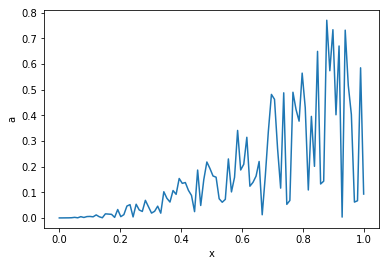

In [5]:
# let's make a simple plot
p.plot('x', 'a')

In [6]:
p2 = pn.PointData(x=np.random.rand(100))
#p2['x'] = np.random.rand(200)

In [7]:
p2

PointData(OrderedDict([('x', array([0.49571457, 0.19359839, 0.35217131, 0.69175145, 0.42738324,
       0.12341648, 0.89000246, 0.62161402, 0.74566984, 0.59035606,
       0.85531972, 0.8090074 , 0.12322552, 0.48272559, 0.85989528,
       0.9666906 , 0.32704768, 0.13133507, 0.71357974, 0.69270344,
       0.61919793, 0.53668389, 0.82447961, 0.04024533, 0.49580583,
       0.62922149, 0.55273714, 0.86362585, 0.13374499, 0.04358854,
       0.89051328, 0.32403361, 0.81993771, 0.01429186, 0.32620622,
       0.88747681, 0.37700479, 0.13856255, 0.86452542, 0.81330301,
       0.99915007, 0.72849707, 0.31267425, 0.99394638, 0.49469921,
       0.81034263, 0.24108155, 0.75075674, 0.8090826 , 0.03956726,
       0.07196764, 0.856027  , 0.0763176 , 0.21614762, 0.99006409,
       0.22792294, 0.95478032, 0.18875793, 0.79651628, 0.0213272 ,
       0.6290409 , 0.89402782, 0.68810565, 0.47392608, 0.68284155,
       0.73309853, 0.05599958, 0.19952032, 0.58609598, 0.93980906,
       0.33545413, 0.75432905, 0.

In [8]:
#p2.plot()
#p2['a'] = p.interpolate('a', method='linear')#(p2).plot('x', 'a', '.')
p2 = p.interpolate('a', method='linear')(pn.PointData(x=np.random.rand(100)))#.plot('x', 'a', '.')

Automatic interpolation with respect to x


[4.50888398e-06 4.50888398e-06 4.50888398e-06 4.50888398e-06
 4.50888398e-06 4.50888398e-06 7.98246126e-05 7.98246126e-05
 7.98246126e-05 7.98246126e-05 7.98246126e-05 7.98246126e-05
 7.98246126e-05 7.98246126e-05 7.98246126e-05 1.79243564e-04
 1.79243564e-04 1.79243564e-04 1.79243564e-04 1.79243564e-04
 2.29603574e-04 2.29603574e-04 2.29603574e-04 2.45418295e-04
 2.45562160e-04 2.45562160e-04 2.93514896e-04 2.93514896e-04
 2.93514896e-04 2.93514896e-04 2.93514896e-04 2.93514896e-04
 2.93514896e-04 2.93514896e-04 2.93514896e-04 2.93514896e-04
 2.93514896e-04 2.93514896e-04 1.84610887e-03 1.84610887e-03
 1.84610887e-03 1.84610887e-03 1.84610887e-03 1.84610887e-03
 1.84610887e-03 1.84610887e-03 1.84610887e-03 1.84610887e-03
 1.84610887e-03 2.17663610e-03 2.17663610e-03 2.17663610e-03
 1.59230669e-03 1.59230669e-03 1.59230669e-03 1.59230669e-03
 1.59230669e-03 1.59230669e-03 7.18151217e-04 7.18151217e-04
 7.18151217e-04 7.18151217e-04 1.56881878e-03 1.56881878e-03
 2.26199078e-03 2.261990

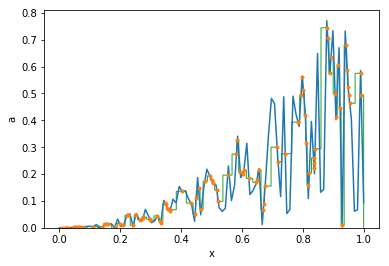

In [9]:
p.plot('x', 'a')
p2.plot('.')
p2.interpolate('a', method='nearest')(x=np.linspace(0,1,1000)).plot()

[0.01584164 0.10639761 0.34151624 0.70202258 1.28801782 1.54839022
 2.16214687 3.31339442 4.13968755 3.535329  ]
<class 'numpy.ndarray'>
<class 'pynocular.griddata.GridDataDim'>


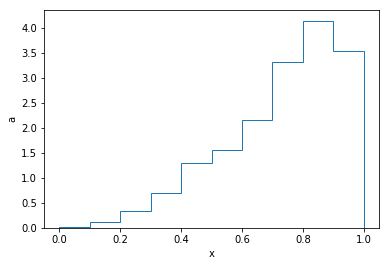

In [10]:
# Generate a histogram function for histograms with weight 'a'
f = p.histogram('a')

# we can evaluate the function on, say 'x', which returns a new object
g = f('x')

# let's plot the result
g.plot()

[3.22313747e-03 0.00000000e+00 1.28639464e-02 0.00000000e+00
 0.00000000e+00 2.07942818e-03 1.32604135e-01 0.00000000e+00
 9.30004205e-02 5.29263757e-02 0.00000000e+00 7.29818196e-02
 2.44683065e-02 4.92873431e-04 0.00000000e+00 1.08928107e-01
 1.85732855e-02 1.32372921e-01 1.43259729e-01 0.00000000e+00
 1.88158380e-02 1.77280225e-01 4.85115832e-02 0.00000000e+00
 7.23227355e-02 0.00000000e+00 1.06849537e-01 0.00000000e+00
 2.13868509e-01 0.00000000e+00 0.00000000e+00 2.25062670e-01
 0.00000000e+00 2.52127947e-02 1.43230764e-01 1.61946073e-01
 0.00000000e+00 0.00000000e+00 1.62867758e-01 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 4.49969315e-01
 3.10286035e-02 0.00000000e+00 1.49665436e-01 1.72131299e-01
 4.02233416e-01 0.00000000e+00 2.64068006e-01 0.00000000e+00
 4.57594072e-01 0.00000000e+00 0.00000000e+00 5.71376456e-05
 2.29793651e-01 9.12577094e-01 0.00000000e+00 8.51894694e-01
 3.77347333e-01 7.64837689e-02 9.20195784e-02 5.24855797e-03
 1.63565243e-01 4.297081

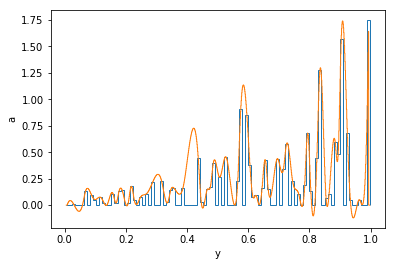

In [11]:
p.histogram('a')(y=100).plot()
p.binwise('a', function=np.sum, fill_value=np.nan)(y=100).interpolate('a', method='cubic')(y=1000).plot()

[0.29669744 0.50107704 0.63764843 0.71832006 1.20502807 2.71598465
 1.73271555 2.12313318 3.12091439 4.10122513]
<class 'numpy.ndarray'>
<class 'pynocular.griddata.GridDataDim'>
[0.         0.29669744 0.50107704 0.63764843 0.71832006 1.20502807
 2.71598465 1.73271555 2.12313318 3.12091439 4.10122513 0.        ]
<class 'numpy.ndarray'>
[           nan            nan            nan            nan
            nan            nan            nan            nan
            nan            nan            nan            nan
            nan            nan            nan            nan
            nan            nan            nan            nan
            nan            nan            nan            nan
            nan            nan            nan            nan
            nan            nan            nan            nan
            nan            nan            nan            nan
            nan            nan            nan            nan
            nan            nan 3.50218272e-03 7.68950

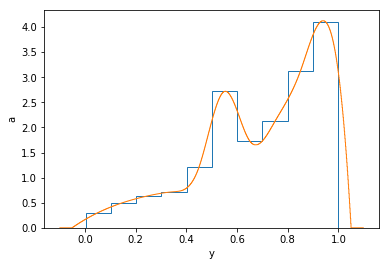

In [12]:
p.histogram('a')('y').plot()
p.binwise('a')(y=np.linspace(-0.1,1.1,13)).interpolate('a', method='cubic')(y=1000).plot()

In [13]:
p.histogram('a')(x=10).grid

[0.01584164 0.10639761 0.34151624 0.70202258 1.28801782 1.54839022
 2.16214687 3.31339442 4.13968755 3.535329  ]
<class 'numpy.ndarray'>


Grid(
Dimension("x",
points = None,
edges = array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]))
nbins = 10),)

[0.01584164 0.10639761 0.34151624 0.70202258 1.28801782 1.54839022
 2.16214687 3.31339442 4.13968755 3.535329  ]
<class 'numpy.ndarray'>
<class 'pynocular.griddata.GridDataDim'>


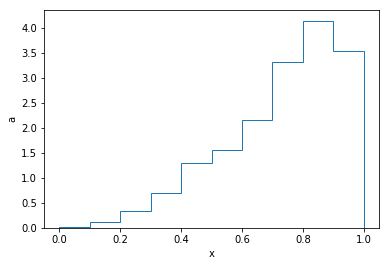

In [14]:
# or in one line
p.histogram('a')('x').plot()

[[0.00000000e+00 4.92873431e-04 1.76109283e-03 3.15448988e-04
  7.11945733e-04 2.63365144e-04 5.24855797e-03 0.00000000e+00
  2.19125714e-03 4.85709550e-03]
 [2.65028981e-03 0.00000000e+00 4.57551180e-03 4.28336584e-03
  1.39149537e-02 2.06518697e-02 1.58895581e-02 1.16963103e-02
  3.27357532e-02 0.00000000e+00]
 [3.89627946e-03 4.92964701e-03 1.27271530e-02 2.52127947e-02
  3.10286035e-02 4.37193027e-02 0.00000000e+00 0.00000000e+00
  1.21940561e-01 9.80619013e-02]
 [0.00000000e+00 1.85732855e-02 4.46156449e-02 0.00000000e+00
  1.07696316e-01 0.00000000e+00 1.68503347e-01 1.06770523e-01
  1.02091518e-01 1.53771949e-01]
 [0.00000000e+00 2.44683065e-02 4.85115832e-02 0.00000000e+00
  8.77365178e-02 1.07620531e-01 1.49408078e-01 1.92749115e-01
  2.72749277e-01 4.04774409e-01]
 [0.00000000e+00 0.00000000e+00 2.08157648e-01 1.01406861e-01
  1.58216346e-01 3.45811479e-01 1.63565243e-01 2.30043305e-01
  0.00000000e+00 3.41189343e-01]
 [1.22930847e-02 0.00000000e+00 0.00000000e+00 5.87101588e

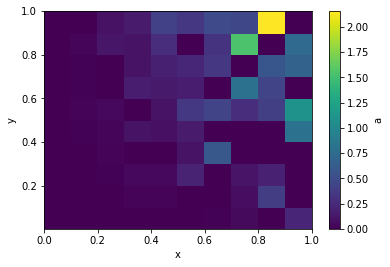

In [15]:
# we can also evaluate the histogram in different dimensions
p.histogram('a')('x', 'y').plot(cbar=True)

[0.01584164 0.10639761 0.34151624 0.70202258 1.28801782 1.54839022
 2.16214687 3.31339442 4.13968755 3.535329  ]
<class 'numpy.ndarray'>
<class 'pynocular.griddata.GridDataDim'>
[0.01584164 0.10639761 0.34151624 0.70202258 1.28801782 1.54839022
 2.16214687 3.31339442 4.13968755 3.535329  ]
<class 'numpy.ndarray'>
[0.01584164 0.10639761 0.10639761 0.34151624 0.70202258 1.28801782
 1.54839022 1.54839022 2.16214687 3.31339442 4.13968755 4.13968755
 3.535329  ]
<class 'numpy.ndarray'>
<class 'pynocular.griddata.GridDataDim'>
[0.01584164 0.10639761 0.34151624 0.70202258 1.28801782 1.54839022
 2.16214687 3.31339442 4.13968755 3.535329  ]
<class 'numpy.ndarray'>
[0.14253828 1.44979354 3.78202463]
<class 'numpy.ndarray'>
<class 'pynocular.griddata.GridDataDim'>


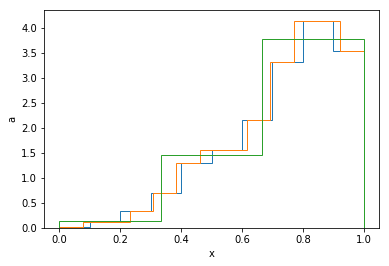

In [16]:


# we can also evaluate the histogram in different dimensions
g = p.histogram('a')('x').plot()
g = p.histogram('a')('x').resample('a')(x=13).plot()
g = p.histogram('a')('x').resample('a')(x=3).plot()


In [17]:
f = p.histogram('a')('x').resample('a')

[0.01584164 0.10639761 0.34151624 0.70202258 1.28801782 1.54839022
 2.16214687 3.31339442 4.13968755 3.535329  ]
<class 'numpy.ndarray'>


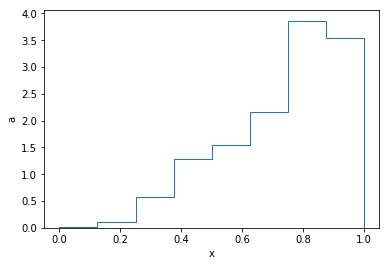

In [59]:
f(f(x=8)).plot()

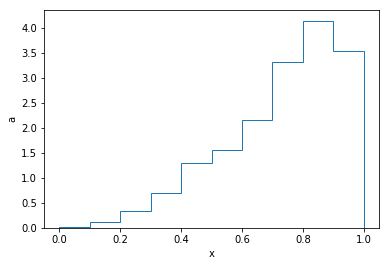

In [60]:
# or the function from before in a different binnig
f(x=30).plot()

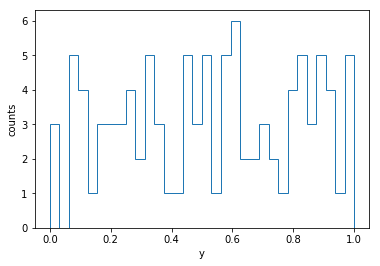

In [61]:
# a histogram with no weights, evaluated in y
p.histogram()(y=np.linspace(0,1,33)).plot()

In [62]:
# the returned object is a GridData type
g = p.histogram('a')(x=20)

In [63]:
# it has a grid defined
g

GridData(Grid(
Dimension("x",
points = None,
edges = array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]))
nbins = 20),)
OrderedDict([('a', array([1.29075987e-03, 1.45508769e-02, 2.68800657e-02, 7.95175468e-02,
       1.19614981e-01, 2.21901261e-01, 2.11047846e-01, 4.90974738e-01,
       4.92574632e-01, 7.95443186e-01, 5.30576611e-01, 1.01781361e+00,
       9.48725884e-01, 1.21342098e+00, 1.39016462e+00, 1.92322981e+00,
       1.78517684e+00, 2.35451071e+00, 2.32471031e+00, 1.21061869e+00]))]))

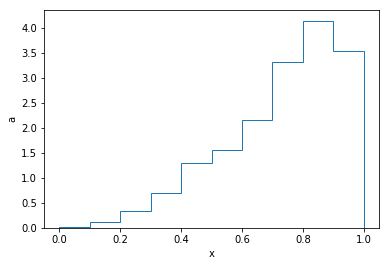

In [64]:
# this evaluates the function from earlier on g
f(g).plot()

In [65]:
g

GridData(Grid(
Dimension("x",
points = None,
edges = array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]))
nbins = 20),)
OrderedDict([('a', array([1.29075987e-03, 1.45508769e-02, 2.68800657e-02, 7.95175468e-02,
       1.19614981e-01, 2.21901261e-01, 2.11047846e-01, 4.90974738e-01,
       4.92574632e-01, 7.95443186e-01, 5.30576611e-01, 1.01781361e+00,
       9.48725884e-01, 1.21342098e+00, 1.39016462e+00, 1.92322981e+00,
       1.78517684e+00, 2.35451071e+00, 2.32471031e+00, 1.21061869e+00]))]))

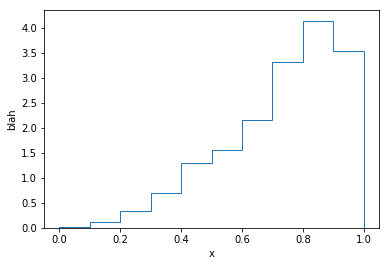

In [70]:
# or assign it a new variable which will automatically evaluate (looks a bit abstract)
g['blah'] = f(g)
g.plot('blah')

In [71]:
f(g)

GridData(Grid(
Dimension("x",
points = None,
edges = array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]))
nbins = 20),)
OrderedDict([('a', array([0.01584164, 0.01584164, 0.10639761, 0.10639761, 0.34151624,
       0.34151624, 0.70202258, 0.70202258, 1.28801782, 1.28801782,
       1.54839022, 1.54839022, 2.16214687, 2.16214687, 3.31339442,
       3.31339442, 4.13968755, 4.13968755, 3.535329  , 3.535329  ]))]))

In [72]:
g

GridData(Grid(
Dimension("x",
points = None,
edges = array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]))
nbins = 20),)
OrderedDict([('a', array([1.29075987e-03, 1.45508769e-02, 2.68800657e-02, 7.95175468e-02,
       1.19614981e-01, 2.21901261e-01, 2.11047846e-01, 4.90974738e-01,
       4.92574632e-01, 7.95443186e-01, 5.30576611e-01, 1.01781361e+00,
       9.48725884e-01, 1.21342098e+00, 1.39016462e+00, 1.92322981e+00,
       1.78517684e+00, 2.35451071e+00, 2.32471031e+00, 1.21061869e+00])), ('blah', array([0.01584164, 0.01584164, 0.10639761, 0.10639761, 0.34151624,
       0.34151624, 0.70202258, 0.70202258, 1.28801782, 1.28801782,
       1.54839022, 1.54839022, 2.16214687, 2.16214687, 3.31339442,
       3.31339442, 4.13968755, 4.13968755, 3.535329  , 3.535329  ]))]))

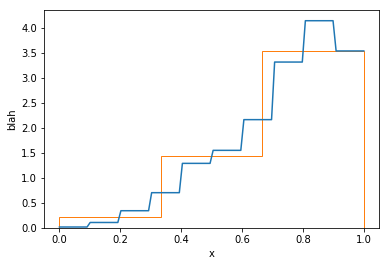

In [73]:
g.lookup('blah')(p).plot('x', 'blah')#'x', 'blah')
g.resample('blah')(x=3).plot()#'x', 'blah')

In [74]:
#p['blah'] = 

p2 = g.lookup('blah')(p)

In [75]:
p2 = pn.PointData()
p2['x'] = np.linspace(0,1,33)

In [77]:
p2['blah'] = g.lookup('blah')(p2)

In [79]:
p2['f'] = g.lookup('blah')(p2)

In [80]:
p2

PointData(OrderedDict([('x', array([0.     , 0.03125, 0.0625 , 0.09375, 0.125  , 0.15625, 0.1875 ,
       0.21875, 0.25   , 0.28125, 0.3125 , 0.34375, 0.375  , 0.40625,
       0.4375 , 0.46875, 0.5    , 0.53125, 0.5625 , 0.59375, 0.625  ,
       0.65625, 0.6875 , 0.71875, 0.75   , 0.78125, 0.8125 , 0.84375,
       0.875  , 0.90625, 0.9375 , 0.96875, 1.     ])), ('blah', array([0.01584164, 0.01584164, 0.01584164, 0.01584164, 0.10639761,
       0.10639761, 0.10639761, 0.34151624, 0.34151624, 0.34151624,
       0.70202258, 0.70202258, 0.70202258, 1.28801782, 1.28801782,
       1.28801782, 1.54839022, 1.54839022, 1.54839022, 1.54839022,
       2.16214687, 2.16214687, 2.16214687, 3.31339442, 3.31339442,
       3.31339442, 4.13968755, 4.13968755, 4.13968755, 3.535329  ,
       3.535329  , 3.535329  , 3.535329  ])), ('f', PointData(...))]))

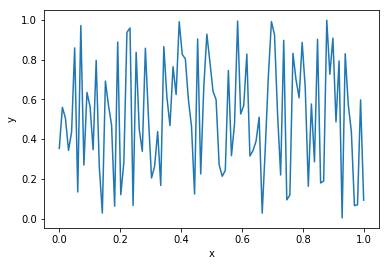

In [81]:
p.plot('x', 'y')

In [82]:
p.data

OrderedDict([('x',
              array([0.        , 0.01010101, 0.02020202, 0.03030303, 0.04040404,
                     0.05050505, 0.06060606, 0.07070707, 0.08080808, 0.09090909,
                     0.1010101 , 0.11111111, 0.12121212, 0.13131313, 0.14141414,
                     0.15151515, 0.16161616, 0.17171717, 0.18181818, 0.19191919,
                     0.2020202 , 0.21212121, 0.22222222, 0.23232323, 0.24242424,
                     0.25252525, 0.26262626, 0.27272727, 0.28282828, 0.29292929,
                     0.3030303 , 0.31313131, 0.32323232, 0.33333333, 0.34343434,
                     0.35353535, 0.36363636, 0.37373737, 0.38383838, 0.39393939,
                     0.4040404 , 0.41414141, 0.42424242, 0.43434343, 0.44444444,
                     0.45454545, 0.46464646, 0.47474747, 0.48484848, 0.49494949,
                     0.50505051, 0.51515152, 0.52525253, 0.53535354, 0.54545455,
                     0.55555556, 0.56565657, 0.57575758, 0.58585859, 0.5959596 ,
         

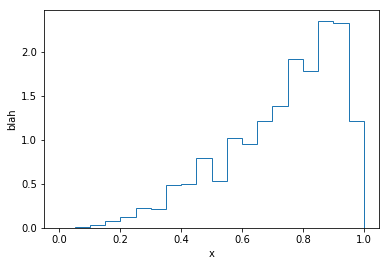

In [83]:
# or again all together
g['blah'] = p.histogram('a')(g)
g.plot('blah')

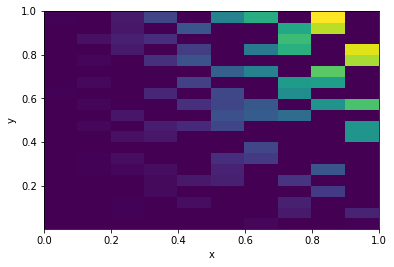

In [85]:
p.binwise('a', method='mean')('x', y=20).plot()

In [86]:
p.binwise('a', function=lambda x : np.percentile(x,50))('x', y=20)['a']

GridDataDim(a : [[           nan            nan 4.92873431e-04            nan
             nan 1.76109283e-03 3.15448988e-04 0.00000000e+00
  7.11945733e-04            nan 2.06227499e-04 5.71376456e-05
  5.24855797e-03            nan            nan            nan
             nan 2.19125714e-03            nan 4.85709550e-03]
 [5.70861632e-04 2.07942818e-03            nan            nan
             nan 4.57551180e-03 4.28336584e-03            nan
             nan 1.39149537e-02            nan 1.03259349e-02
             nan 1.58895581e-02            nan 1.16963103e-02
             nan 3.27357532e-02            nan            nan]
 [           nan 3.89627946e-03 4.92964701e-03            nan
             nan 1.27271530e-02 2.52127947e-02            nan
  3.10286035e-02            nan 4.37193027e-02            nan
             nan            nan            nan            nan
  5.33506688e-02 6.85898918e-02 4.62792890e-02 5.17826123e-02]
 [           nan            nan            nan 1.85

In [87]:
g = pn.GridData('x','y')

In [88]:
g.grid

Grid(
Dimension("x",
points = None,
edges = None)
nbins = 10),
Dimension("y",
points = None,
edges = None)
nbins = 10),)

In [94]:
g['b'] = p.histogram()(g)

In [95]:
p.histogram()(g)

GridData(Grid(
Dimension("x",
points = None,
edges = array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]))
nbins = 10),
Dimension("y",
points = None,
edges = array([0.00373227, 0.10318076, 0.20262925, 0.30207774, 0.40152623,
       0.50097472, 0.60042321, 0.6998717 , 0.79932019, 0.89876868,
       0.99821717]))
nbins = 10),)
OrderedDict([('counts', array([[0., 1., 1., 2., 1., 2., 1., 0., 1., 1.],
       [2., 0., 1., 1., 1., 2., 1., 1., 1., 0.],
       [1., 1., 1., 1., 1., 1., 0., 0., 2., 2.],
       [0., 1., 2., 0., 2., 0., 2., 1., 1., 1.],
       [0., 1., 1., 0., 1., 1., 1., 1., 2., 2.],
       [0., 0., 3., 1., 1., 2., 1., 1., 0., 1.],
       [1., 0., 0., 4., 0., 2., 0., 1., 1., 1.],
       [1., 1., 1., 0., 0., 1., 2., 0., 3., 1.],
       [0., 3., 1., 0., 0., 1., 1., 1., 0., 3.],
       [4., 0., 0., 0., 2., 2., 0., 1., 1., 0.]]))]))

In [96]:
g.grid

Grid(
Dimension("x",
points = None,
edges = array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]))
nbins = 10),
Dimension("y",
points = None,
edges = array([0.00373227, 0.10318076, 0.20262925, 0.30207774, 0.40152623,
       0.50097472, 0.60042321, 0.6998717 , 0.79932019, 0.89876868,
       0.99821717]))
nbins = 10),)

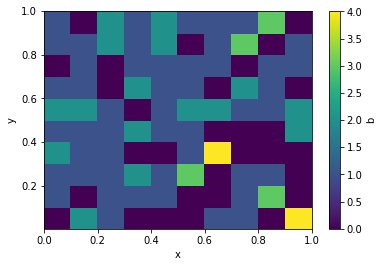

In [97]:
g.plot(cbar=True)

In [98]:
g['x']

GridDataDim(x : [[0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05]
 [0.15 0.15 0.15 0.15 0.15 0.15 0.15 0.15 0.15 0.15]
 [0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25]
 [0.35 0.35 0.35 0.35 0.35 0.35 0.35 0.35 0.35 0.35]
 [0.45 0.45 0.45 0.45 0.45 0.45 0.45 0.45 0.45 0.45]
 [0.55 0.55 0.55 0.55 0.55 0.55 0.55 0.55 0.55 0.55]
 [0.65 0.65 0.65 0.65 0.65 0.65 0.65 0.65 0.65 0.65]
 [0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75]
 [0.85 0.85 0.85 0.85 0.85 0.85 0.85 0.85 0.85 0.85]
 [0.95 0.95 0.95 0.95 0.95 0.95 0.95 0.95 0.95 0.95]])

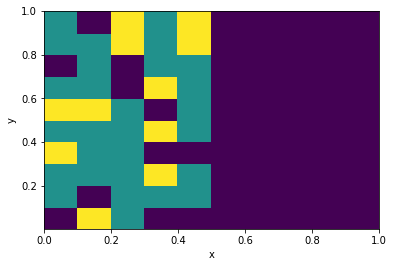

In [101]:
g['c'] = p[p['x'] < 0.5].histogram()(g)
g.plot('c')

In [102]:
grid = pn.grid.Grid(x=[0., 0.5,np.inf], y=10)

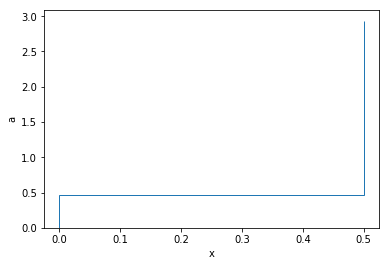

In [104]:
p.binwise('a', method='mean')(grid).histogram('a')('x').plot()

In [105]:
p[p['x'] < 1].histogram()

<function pynocular.data.Data.binwise.<locals>.fun(*args, **kwargs)>

In [106]:
# let's go a bit crazy....what's f(f(x))?
# it's the same as f(x) here because we already histogrammed

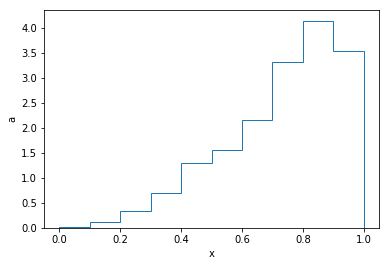

In [107]:
f(f('x')).plot()

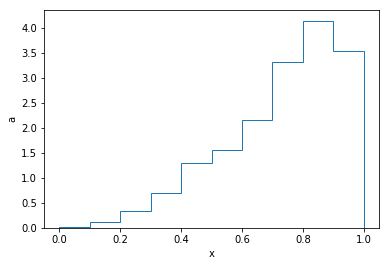

In [108]:
# or first histogram it in x and y and then only x.....again the same
f('x').histogram('a')('x').plot()

In [109]:
p.vars

['x', 'y', 'a', 'blah']

In [110]:
g = f(x=100)

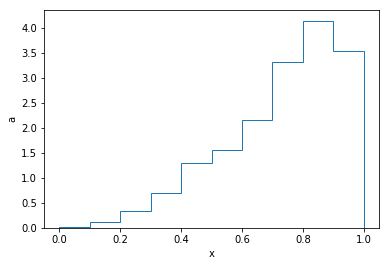

In [111]:
g.plot('a')

In [112]:
g.grid.point_meshgrid

[array([0.005, 0.015, 0.025, 0.035, 0.045, 0.055, 0.065, 0.075, 0.085,
        0.095, 0.105, 0.115, 0.125, 0.135, 0.145, 0.155, 0.165, 0.175,
        0.185, 0.195, 0.205, 0.215, 0.225, 0.235, 0.245, 0.255, 0.265,
        0.275, 0.285, 0.295, 0.305, 0.315, 0.325, 0.335, 0.345, 0.355,
        0.365, 0.375, 0.385, 0.395, 0.405, 0.415, 0.425, 0.435, 0.445,
        0.455, 0.465, 0.475, 0.485, 0.495, 0.505, 0.515, 0.525, 0.535,
        0.545, 0.555, 0.565, 0.575, 0.585, 0.595, 0.605, 0.615, 0.625,
        0.635, 0.645, 0.655, 0.665, 0.675, 0.685, 0.695, 0.705, 0.715,
        0.725, 0.735, 0.745, 0.755, 0.765, 0.775, 0.785, 0.795, 0.805,
        0.815, 0.825, 0.835, 0.845, 0.855, 0.865, 0.875, 0.885, 0.895,
        0.905, 0.915, 0.925, 0.935, 0.945, 0.955, 0.965, 0.975, 0.985,
        0.995])]

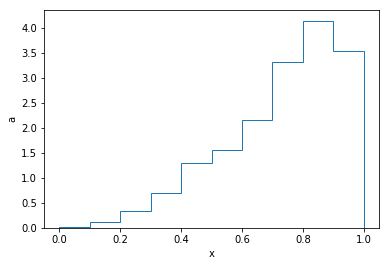

In [113]:
g.interpolate('a', method='cubic')(x=100).plot()

In [114]:
np.concatenate([[1,2,3], [3,4]])

array([1, 2, 3, 3, 4])

In [115]:
a = {'x':2}

In [116]:
a.update({'y':7})

In [117]:
a

{'x': 2, 'y': 7}

In [118]:
from collections import OrderedDict

In [119]:
a = OrderedDict({'x':2})


In [120]:
a

OrderedDict([('x', 2)])

In [121]:
a.update({'y':7})

In [122]:
a

OrderedDict([('x', 2), ('y', 7)])

In [123]:
a.update({'x':23})

In [124]:
a

OrderedDict([('x', 23), ('y', 7)])

In [125]:
a['k'] = a.pop('y')

In [126]:
a

OrderedDict([('x', 23), ('k', 7)])

In [127]:
a = np.arange(24).reshape(4,3,2)

In [128]:
a

array([[[ 0,  1],
        [ 2,  3],
        [ 4,  5]],

       [[ 6,  7],
        [ 8,  9],
        [10, 11]],

       [[12, 13],
        [14, 15],
        [16, 17]],

       [[18, 19],
        [20, 21],
        [22, 23]]])

In [129]:
a.reshape(-1, *a.shape[2:])[0] +=1

In [130]:
a

array([[[ 1,  2],
        [ 2,  3],
        [ 4,  5]],

       [[ 6,  7],
        [ 8,  9],
        [10, 11]],

       [[12, 13],
        [14, 15],
        [16, 17]],

       [[18, 19],
        [20, 21],
        [22, 23]]])

In [131]:
p2['b'] = np.arange(len(p2)*2).reshape(-1,2)

In [132]:
#p2.histogram('b')('x')

In [133]:
list(range(10))[2:]

[2, 3, 4, 5, 6, 7, 8, 9]

In [134]:
isinstance(3., float)

True

In [135]:
g.grid
#

Grid(
Dimension("x",
points = None,
edges = array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99, 1.  ]))
nbins = 100),)

In [136]:
g.resample('a')(x=0.5).grid

Grid(
Dimension("x",
points = None,
edges = array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ,
       0.22, 0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42,
       0.44, 0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64,
       0.66, 0.68, 0.7 , 0.72, 0.74, 0.76, 0.78, 0.8 , 0.82, 0.84, 0.86,
       0.88, 0.9 , 0.92, 0.94, 0.96, 0.98, 1.  ]))
nbins = 50),)

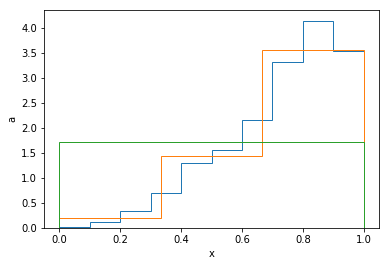

In [137]:
g.resample('a')(x=0.5).plot()
g.resample('a')(x=0.03).plot()
g.resample('a')(x=0.01).plot()

In [138]:
import matplotlib.image as mpimg

img=mpimg.imread('on-fire.jpeg')

img1d = np.average(img, axis=-1)

In [139]:
img1d.shape

(722, 1280)

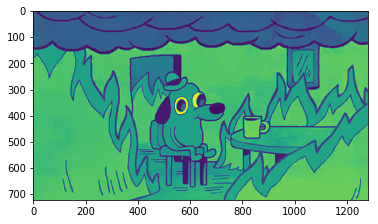

In [140]:
from matplotlib import pyplot as plt
plt.imshow(img1d)

In [141]:
g = pn.GridData()#x=np.arange(1281), y=np.arange(723))

In [142]:
g['img'] = img1d.T[:,::-1]

adding default grid


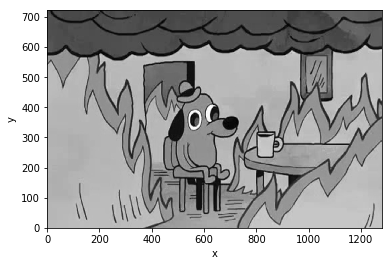

In [143]:
g.plot('img', cmap='gray')

In [144]:
#gs = g.resample('img')(x=0.1, y=0.1)

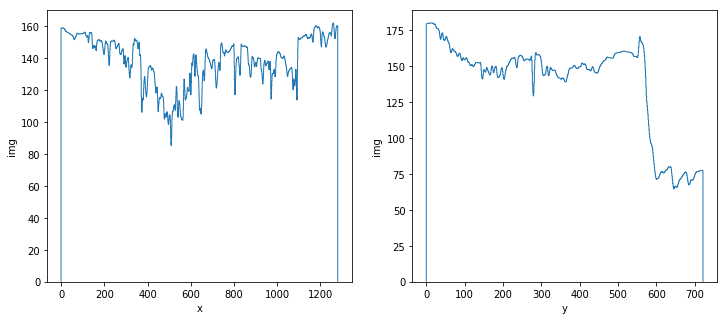

In [146]:
fig, ax = plt.subplots(1,2, figsize=(12,5))
f = g.binwise('img', method='mean')
f('x').plot(ax=ax[0])
f('y').plot(ax=ax[1])

In [147]:
N = 300
pd = pn.PointData(x=np.random.rand(N)*1280, y=np.random.rand(N)*722)

In [160]:
pd['img'] = g.lookup('img')(pd)

OrderedDict([('x', array([ 928.52505764,  747.31138566,  223.96613216,  319.64047591,
        758.85553541, 1242.29781409,  869.6621515 ,  408.95623662,
         36.75779992, 1061.50058848,  257.23812926,  632.74955459,
        867.55767814, 1075.72904366,  986.62831228,  807.4412156 ,
        730.67581278,  597.72435719,  814.50517525,  134.2133081 ,
        317.16665408, 1109.05238764,    8.26822235,  504.62627619,
        997.13717929,  756.21372341,  167.76227473,  290.51701564,
       1279.57416969,  884.39393357,  719.98067393,  573.34436845,
       1231.57451905,   99.00197411,  759.18593435,  399.88526308,
        500.91555415,  607.87308536,   81.20849013,  869.87296119,
        850.99893472,  466.35435814,  942.52708609,  549.61214876,
        570.46721674,  776.17494208,  544.80452077,  223.53418356,
        962.00200476,  425.58650394,   61.32576392,  438.87131019,
       1125.93524707,  710.92432063, 1171.82263359, 1143.88790198,
       1164.35862476,  797.82303166, 1022.0

AssertionError: 

ValueError: object __array__ method not producing an array

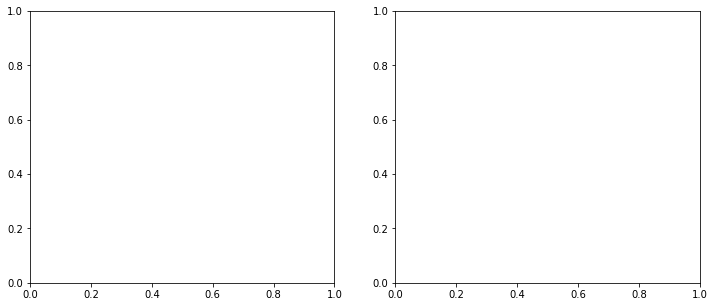

In [156]:
fig, ax = plt.subplots(1,2, figsize=(12,5))
f = pd.binwise('img', method='mean')
f(x=20).plot(ax=ax[0])
f('y').plot(ax=ax[1])

In [157]:
pd

PointData(OrderedDict([('x', array([ 928.52505764,  747.31138566,  223.96613216,  319.64047591,
        758.85553541, 1242.29781409,  869.6621515 ,  408.95623662,
         36.75779992, 1061.50058848,  257.23812926,  632.74955459,
        867.55767814, 1075.72904366,  986.62831228,  807.4412156 ,
        730.67581278,  597.72435719,  814.50517525,  134.2133081 ,
        317.16665408, 1109.05238764,    8.26822235,  504.62627619,
        997.13717929,  756.21372341,  167.76227473,  290.51701564,
       1279.57416969,  884.39393357,  719.98067393,  573.34436845,
       1231.57451905,   99.00197411,  759.18593435,  399.88526308,
        500.91555415,  607.87308536,   81.20849013,  869.87296119,
        850.99893472,  466.35435814,  942.52708609,  549.61214876,
        570.46721674,  776.17494208,  544.80452077,  223.53418356,
        962.00200476,  425.58650394,   61.32576392,  438.87131019,
       1125.93524707,  710.92432063, 1171.82263359, 1143.88790198,
       1164.35862476,  797.823031

In [ ]:
pd.plot_scatter('x', 'y', 'img', s=0.1)

In [ ]:
pd.interpolate('img', method='nearest')(g).plot(cmap='jet')

In [ ]:
pd.interpolate('img', method='nearest')(g).histogram('img', method='mean')('y').plot()